# XOR probléma megtanítása MLP hálóval

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

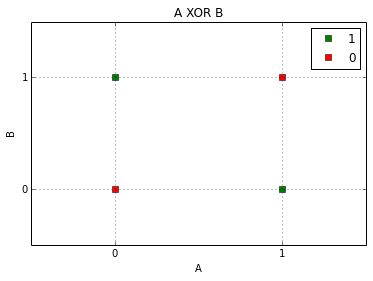

In [2]:
#abrazolas
true_x=np.array([1,0])
true_y=np.array([0,1])
false_x=np.array([0,1])
false_y=np.array([0,1])
plt.plot(true_x,true_y,"gs",label="1");
plt.plot(false_x,false_y,"rs",label="0");
plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
plt.xticks([0,1]);
plt.yticks([0,1]);
plt.grid(True)
plt.title("A XOR B");
plt.xlabel("A");
plt.ylabel("B");
plt.legend(numpoints=1);

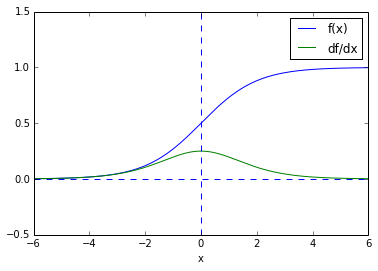

In [3]:
#aktivacios fuggveny es a derivaltja
def activation(x): return 1/(1+np.exp(-x))
def dactivation(x): return np.exp(-x)/((1+np.exp(-x))**2)
x=np.linspace(-6,6,200)
plt.plot(x,activation(x),label="f(x)");
plt.plot(x,dactivation(x),label="df/dx");
plt.xlim(-6,6)
plt.ylim(-0.5,1.5)
plt.axhline(0,linestyle="dashed");
plt.axvline(0,linestyle="dashed");
plt.xlabel("x");
plt.legend();

In [4]:
#univerzalis MultiLevel Perceptron osztaly
#argumentumok: (bemenetek, rejtett retegek neuronszamai (dinamikus!), kimenetek)
class MLP:
    def __init__(self,*args): #"konstruktor"
        np.random.seed(123)
        self.shape=args
        n=len(args)
        #retegek
        self.layers=[]
        self.layers.append(np.ones(self.shape[0]+1)) #bemeneti reteg (+1 bias)
        for i in range(1,n): #rejtett retegek + kimeneti reteg
            self.layers.append(np.ones(self.shape[i]))
        #sulymatrixok
        self.weights=[]
        for i in range(n-1):
            self.weights.append(np.empty([self.layers[i].size,self.layers[i+1].size]))
        self.dw=[0,]*len(self.weights) #a sulyok elozo modositasai (momentummodszerhez)
        self.reset()

    def reset(self): #sulyok inicializalasa
        for i in range(len(self.weights)):
            Z=np.random.random([self.layers[i].size,self.layers[i+1].size])
            self.weights[i]=2*Z-1 #[-1;1[ intervallumba skalazas

    def propagate_forward(self,data): #a halozat futtatasa a megadott adatra
        self.layers[0][0:-1]=data
        for i in range(1,len(self.shape)):
            self.layers[i]=activation(np.dot(self.layers[i-1],self.weights[i-1]))
        return self.layers[-1]

    def propagate_backward(self,target,lrate,momentum): #hibavisszaterjesztes
        deltas=[]
        error=self.layers[-1]-target
        delta=error*dactivation(np.dot(self.layers[-2],self.weights[-1]))
        deltas.append(delta)
        for i in range(len(self.shape)-2,0,-1): #gradiens a rejtett retegekben
            delta=(np.dot(deltas[0],self.weights[i].T) *
                   dactivation(np.dot(self.layers[i-1],self.weights[i-1])))
            deltas.insert(0,delta)
        for i in range(len(self.weights)): #sulyok modositasa (tanulas)
            layer=np.atleast_2d(self.layers[i])
            delta=np.atleast_2d(deltas[i])
            dw=-lrate*np.dot(layer.T,delta)+momentum*self.dw[i]
            self.weights[i]+=dw
            self.dw[i]=dw
        return (error**2).sum()

In [5]:
#a halo megtanitasa Stochastic Gradient Descent modszerrel
def learn(network,samples,epochs=1000,lrate=1,momentum=0.9):
    err=np.empty(epochs)
    for i in range(epochs):
        n=np.random.randint(samples.size)
        network.propagate_forward(samples["input"][n])
        err[i]=network.propagate_backward(samples["output"][n],lrate,momentum)
    print("Tanitas kesz!")
    plt.plot(err);
    plt.title("Konvergencia")
    plt.xlabel("epoch");
    plt.ylabel("negyzetes hiba");
    out=np.empty(samples.size)
    for i in range(samples.size):
        out[i]=network.propagate_forward(samples["input"][i])
        print("%d. bemenet: %s, elvart kimenet: %.4f, valos kimenet: %.4f" %
              (i+1,str(samples["input"][i]),samples["output"][i],out[i]))

In [6]:
#tanito adatok
samples=np.empty(4,dtype=[("input",float,2),("output",float,1)])
samples[0]=[0,0],0
samples[1]=[1,0],1
samples[2]=[0,1],1
samples[3]=[1,1],0

Tanitas kesz!
1. bemenet: [ 0.  0.], elvart kimenet: 0.0000, valos kimenet: 0.0064
2. bemenet: [ 1.  0.], elvart kimenet: 1.0000, valos kimenet: 0.9916
3. bemenet: [ 0.  1.], elvart kimenet: 1.0000, valos kimenet: 0.9919
4. bemenet: [ 1.  1.], elvart kimenet: 0.0000, valos kimenet: 0.0104


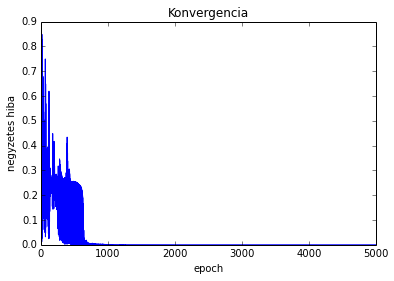

In [7]:
network=MLP(2,10,1) #halo 2 bemenettel, egy 10 neuronos rejtett reteggel, 1 kimenettel
epochs=5000 #epoch szam
lrate=1 #tanulasi rata
momentum=0.9 #momentum
learn(network,samples,epochs,lrate,momentum) #tanitas

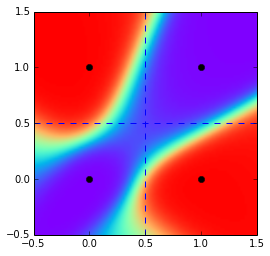

In [8]:
#a halo mukodesenek abrazolasa
out_image=np.empty([101,101])
for i,x in enumerate(np.linspace(-0.5,1.5,101)):
    for j,y in enumerate(np.linspace(-0.5,1.5,101)):
        out_image[i,j]=network.propagate_forward([x,y]);
plt.imshow(out_image.T[::-1],extent=[-0.5,1.5,-0.5,1.5],cmap=cm.rainbow);
plt.plot(true_x,true_y,"ko");
plt.plot(false_x,false_y,"ko");
plt.axhline(0.5,linestyle="dashed");
plt.axvline(0.5,linestyle="dashed");
plt.xlim(-0.5,1.5);
plt.ylim(-0.5,1.5);